#Module 2: Algorithmic Thinking

In [1]:
from __future__ import division
import urllib2
import random
import time
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import Counter,OrderedDict
import numpy as np
import mod_2_hmwk
random.seed(1)

In [2]:
%matplotlib inline

In [3]:
def copy_graph(graph):
    """
    Make a copy of a graph
    """
    new_graph = {}
    for node in graph:
        new_graph[node] = set(graph[node])
    return new_graph

def delete_node(ugraph, node):
    """
    Delete a node from an undirected graph
    """
    neighbors = ugraph[node]
    ugraph.pop(node)
    for neighbor in neighbors:
        ugraph[neighbor].remove(node)
    
def targeted_order(ugraph):
    """
    Compute a targeted attack order consisting
    of nodes of maximal degree
    
    Returns:
    A list of nodes
    """
    # copy the graph
    new_graph = copy_graph(ugraph)
    
    order = []    
    while len(new_graph) > 0:
        max_degree = -1
        for node in new_graph.keys():
            if len(new_graph[node]) > max_degree:
                max_degree = len(new_graph[node])
                max_degree_node = node
        
        neighbors = new_graph[max_degree_node]
        new_graph.pop(max_degree_node)
        for neighbor in neighbors:
            new_graph[neighbor].remove(max_degree_node)

        order.append(max_degree_node)
    return order
    


##########################################################
# Code for loading computer network graph

NETWORK_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_rf7.txt"


def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urllib2.urlopen(graph_url)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    print "Loaded graph with", len(graph_lines), "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph

In [63]:
def ER_graph(num_nodes):
    p = .0011
    i_j_pairs = [(i,j) for i in range(1,num_nodes+1) for j in range(1,num_nodes+1) if i!=j]
    ER_graph = {}
    for pair in i_j_pairs:
        if random.random()<p:
            if pair[0] not in ER_graph.keys():
                ER_graph[pair[0]] = set([])
                ER_graph[pair[0]].add(pair[1])
            else:
                ER_graph[pair[0]].add(pair[1])
            if pair[1] not in ER_graph.keys():
                ER_graph[pair[1]] = set([])
                ER_graph[pair[1]].add(pair[0])
            else:
                ER_graph[pair[1]].add(pair[0])
    return ER_graph

In [5]:
class UPATrial:
    """
    Simple class to encapsulate optimizated trials for the UPA algorithm
    
    Maintains a list of node numbers with multiple instance of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a UPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._m = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]
        self._graph = {node:{_ for _ in range(num_nodes) if _!=node} for node in range(num_nodes)}


    def run_trial(self, num_nodes):
        """
        Conduct num_nodes trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that each node number
        appears in correct ratio
        
        Returns:
        Set of nodes
        """
        
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for _ in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        for dummy_idx in range(len(new_node_neighbors)):
            self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))

        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors
    
    def complete_setup(self,n):
        for index in range(self._num_nodes,n):
            self.run_trial(index)
            self._graph[index]= set([])
            new_neighbors = set(np.random.choice(self._node_numbers,self._m,replace=True))
            new_neighbors = {neighbor for neighbor in new_neighbors if neighbor != index}
            self._graph[index]= new_neighbors
            for neighbor in new_neighbors:
                self._graph[neighbor].add(index)

Here is an alternative solution if you are adding N numbers, each between 0.0 and 1.0, and expect the operations X1 + X2 + … and 1.0 - X1 … to behave like they do in math.

Each time you obtain a new number Xi, do: Xi ← 1.0 - (1.0 - Xi). Only use this new value of Xi from that point onwards. This assignment will slightly round Xi so that it behaves well in all sums whose intermediate results are between 0.0 and 1.0.

EDIT: after doing the above for values X1, …, XN-1, compute XN as 1 - X1 - … - XN-1. This floating-point computation will be exact (despite involving floating-point), so that you will have X1 + … + XN = 1 exactly.

In [6]:
def random_order(graph):
    """
    returns a list of the nodes in random order from graph
    """
    nodes = graph.keys()
    random.shuffle(nodes)
    return nodes

In [7]:
graph = load_graph(NETWORK_URL)

Loaded graph with 1239 nodes


In [31]:
# result1 = mod_2_hmwk.compute_resilience(graph,random_order(graph))

In [38]:
# import csv
# resultfile = open("resultfile.csv","w")
# wr = csv.writer(resultfile, dialect='excel')
# wr.writerow(result1)
# resultfile.close()

In [6]:
import csv
with open("resultfile.csv","r") as csvfile:
    resultoriginal = csv.reader(csvfile)
    for row in resultoriginal:
        result1 = row

In [7]:
with open("resultfile2.csv","r") as csvfile:
    resultoriginal = csv.reader(csvfile)
    for row in resultoriginal:
        result2 = row

In [8]:
with open("resultfile3.csv","r") as csvfile:
    resultoriginal = csv.reader(csvfile)
    for row in resultoriginal:
        result3 = row

In [9]:
result1 = map(int,result1)
result2 = map(int,result2)
result3 = map(int,result3)

In [8]:
num_nodes = 1239

In [64]:
ER_G = ER_graph(num_nodes)

In [25]:
# sum(map(len,ER_G.values()))

3036

In [26]:
# result2 = mod_2_hmwk.compute_resilience(ER_G,random_order(ER_G))

In [33]:
# result2file = open("resultfile2.csv","w")
# wr = csv.writer(result2file, dialect='excel')
# wr.writerow(result2)
# result2file.close()

In [10]:
UPA_G = UPATrial(1)

In [11]:
UPA_G.complete_setup(1200)

In [473]:
# result3 = mod_2_hmwk.compute_resilience(UPA_G._graph,random_order(UPA_G._graph))

In [474]:
# import csv
# resultfile = open("resultfile3.csv","w")
# wr = csv.writer(resultfile, dialect='excel')
# wr.writerow(result3)
# resultfile.close()

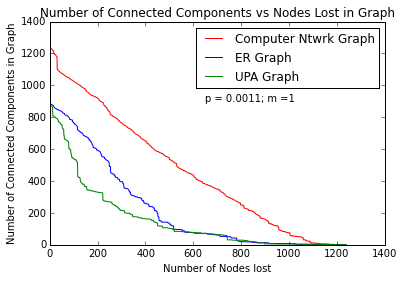

In [23]:
plt.plot(np.linspace(0,num_nodes,num=len(result1)), result1,'r-',label="Computer Ntwrk Graph")
plt.plot(np.linspace(0,num_nodes, num=len(result2)), result2, 'b-', label="ER Graph")
plt.plot(np.linspace(0,num_nodes,num=len(result3)), result3, 'g-', label="UPA Graph")
plt.text(650,900,"p = 0.0011; m =1")
plt.title("Number of Connected Components vs Nodes Lost in Graph")
plt.xlabel("Number of Nodes lost")
plt.ylabel("Number of Connected Components in Graph")
plt.legend()
plt.savefig("ComparisonPlot_plt1.png")
plt.show()

## Q3

In [49]:
def fasttargetedorder(ugraph):
    ugraph = copy_graph(ugraph)
    degreesets = [ set([]) for _ in range(len(ugraph.keys()))]
    for key in ugraph.keys():
        d = len(ugraph[key])
        degreesets[d].add(key) 
    L = []
    for k in range(len(degreesets)-1,-1,-1):
        while degreesets[k]:
            popped_node = degreesets[k].pop()
            for neighbor in ugraph[popped_node]:
                d = len(ugraph[neighbor])
                degreesets[d].remove(neighbor)
                degreesets[d-1].add(neighbor)
            L.append(popped_node)
            delete_node(ugraph,popped_node)
    return L

In [50]:
import gc
fasttargettimes = []
regtargettimes = []
gc.disable()
for n in range(10,1000,10):
    UPAgraph = UPATrial(5)
    UPAgraph.complete_setup(n)
    starttime = time.time()
    fasttargetedorder(UPAgraph._graph)
    endtime = time.time()
    fasttargettimes.append(endtime-starttime)
    starttime = time.time()
    targeted_order(UPAgraph._graph)
    endtime = time.time()
    regtargettimes.append(endtime-starttime)
gc.enable()

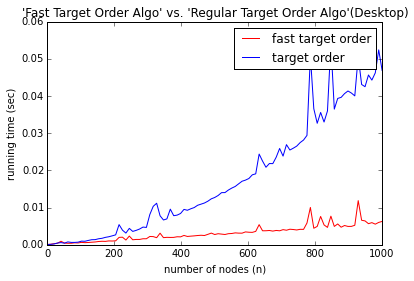

In [74]:
plt.plot(np.linspace(0,1000,num=len(fasttargettimes)),fasttargettimes, 'r-', label="fast target order")
plt.plot(np.linspace(0,1000,num=len(fasttargettimes)),regtargettimes, 'b-', label="target order")
plt.title("'Fast Target Order Algo' vs. 'Regular Target Order Algo'(Desktop)")
plt.xlabel("number of nodes (n) ")
plt.ylabel("running time (sec)")
plt.legend()
plt.savefig("RunTimeComparison.png")
plt.show()

## Q4

In [16]:
fastorderlist = fasttargetedorder(graph)

In [17]:
sloworderlist = targeted_order(graph)

In [26]:
# fastorderlist[:5], sloworderlist[:5]

{8, 49, 453, 464, 596, 756, 846, 989, 1164, 1217}

In [20]:
targetresult1 = mod_2_hmwk.compute_resilience(graph,sloworderlist)

In [65]:
targetlist_ER = fasttargetedorder(ER_G)

In [67]:
targetresult2 = mod_2_hmwk.compute_resilience(ER_G,targetlist_ER)

In [69]:
import csv
resultfile = open("ERtargetresilience.csv","w")
wr = csv.writer(resultfile, dialect='excel')
wr.writerow(targetresult2)
resultfile.close()

In [57]:
targetlist_UPA = fasttargetedorder(UPA_G._graph)

In [59]:
targetresult3 = mod_2_hmwk.compute_resilience(UPA_G._graph,targetlist_UPA)

In [76]:
resultfile = open("UPAtargetresilience.csv","w")
wr = csv.writer(resultfile, dialect='excel')
wr.writerow(targetresult3)
resultfile.close()

In [77]:
resultfile = open("originalgraphtargetresilience.csv", "w")
wr = csv.writer(resultfile, dialect='excel')
wr.writerow(targetresult1)
resultfile.close()

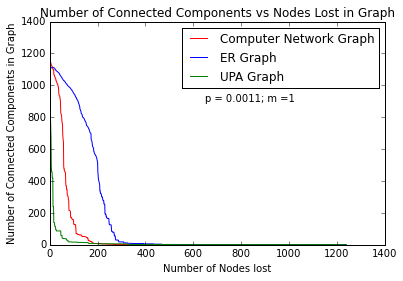

In [73]:
plt.plot(np.linspace(0,num_nodes,num=len(targetresult1)), targetresult1,'r-',label="Computer Network Graph")
plt.plot(np.linspace(0,num_nodes, num=len(targetresult2)), targetresult2, 'b-', label="ER Graph")
plt.plot(np.linspace(0,num_nodes,num=len(targetresult3)), targetresult3, 'g-', label="UPA Graph")
plt.title("Number of Connected Components vs Nodes Lost in Graph")
plt.text(650,900,"p = 0.0011; m =1")
plt.xlabel("Number of Nodes lost")
plt.ylabel("Number of Connected Components in Graph")
plt.legend()
plt.savefig("ComparisonPlot_plt2.png")
plt.show()